In [1]:
import pandas as pd
import holidays

#!pip install holidays
#!pip install openrouteservice

In [2]:
TRAFFIC_DATA_PATH = [
    'traffic_flow_2018.csv',
    'traffic_flow_2019.csv'
]

WEATHER_DATA_PATH = [
    'weather_observed_2018.csv',
    'weather_observed_2019.csv'
]


AIR_QUALITY_PATH = [
    'air_quality_2018.csv',
    'air_quality_2019.csv'
]

# df = pd.read_csv('../data/traffic_flow_2018.csv', encoding='latin-1')

In [3]:
pd.set_option("display.max_colwidth", 500)

In [4]:
pt_holidays = holidays.CountryHoliday('Portugal')

In [5]:
def load_data(data_paths, date_col, value_cols, agg_operation = 'sum'):
    concat_data = []

    for file in data_paths:
        print("Reading file ", file)
        df = pd.read_csv('../data/' + file, encoding='latin-1')
        
        # print(df.head())

        df[date_col] = pd.to_datetime(df[date_col])
        df_resampled = df.set_index(date_col).groupby('entity_id')[value_cols].resample('H').agg(agg_operation).reset_index()
        concat_data.append(df_resampled)

    return pd.concat(concat_data)

In [6]:
"""
import numpy as np
import requests
tmp = requests.get('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/POIs.json').json()
ret = []

for count, point_of_interest in enumerate(tmp['points_of_interest']):
    category = point_of_interest.get('category')[0]['value']
    location = point_of_interest.get('location')
    created = point_of_interest.get('created')
    
    if 'point' in location:
        location = location.get('point')[0].get('Point').get('posList')
    else:
        location = np.nan
    description = point_of_interest.get('description')[0]['value']
    
    ret.append({
        'id': count,
        'created_at': created,
        'category': category,
        'location': location,
        'description': description
    })

df_pois = pd.DataFrame.from_records(ret)
df_pois.to_csv('../data/pois_processed.csv')
"""

"\nimport numpy as np\nimport requests\ntmp = requests.get('https://wdl-data.fra1.digitaloceanspaces.com/porto-digital/POIs.json').json()\nret = []\n\nfor count, point_of_interest in enumerate(tmp['points_of_interest']):\n    category = point_of_interest.get('category')[0]['value']\n    location = point_of_interest.get('location')\n    created = point_of_interest.get('created')\n    \n    if 'point' in location:\n        location = location.get('point')[0].get('Point').get('posList')\n    else:\n        location = np.nan\n    description = point_of_interest.get('description')[0]['value']\n    \n    ret.append({\n        'id': count,\n        'created_at': created,\n        'category': category,\n        'location': location,\n        'description': description\n    })\n\ndf_pois = pd.DataFrame.from_records(ret)\ndf_pois.to_csv('../data/pois_processed.csv')\n"

In [7]:
df_pois = pd.read_csv('../data/pois_processed.csv')

In [8]:
df_pois.head()

,Unnamed: 0,id,created_at,category,location,description
0,0,0,2019-05-06T14:57:05.466000Z,Restaurantes,41.15743895 -8.62750399,"O Restaurante Churrascão Gaucho encontra-se encerrado, de forma a prevenir o surto do Covid-19.\n\nUm dos mais antigos restaurantes de gastronomia brasileira no Porto.\nPossui uma decoração rústica e elegante, num ambiente sofisticado."
1,1,1,2019-05-06T14:57:05.473000Z,Restaurantes,41.14073900 -8.61242000,"O Restaurante da Alzira, fundado em 1984, situa-se na zona da Ribeira do Porto, onde outrora eram os armazéns de bacalhau, num espaço arquitectónico compreendido entre os séculos XVII e XIX que foi ampliado e restaurado segundo o projecto do arquitecto Miguel Guedes. Serve comida tradicional tendo como especialidades o polvo, o bacalhau e o cabrito assados no forno. Apresenta também uma boa variedade de saladas e menu vegetariano."
2,2,2,2019-05-06T14:57:05.471000Z,Restaurantes,41.14580771 -8.60511089,"O restaurante Irmãos Unidos encontra-se encerrado, de forma a prevenir o surto do Covid-19.\n\nRestaurante localizado próximo da Praça dos Poveiros, com uma ementa baseada na cozinha tradicional portuguesa, dando destaque aos pratos típicos do Porto como as Tripas à Moda do Porto, o cabrito e o bacalhau.\n\n"
3,3,3,2019-05-06T14:57:05.476000Z,Restaurantes,41.16256626 -8.59424829,"Localizado na zona das Antas, possui uma decoração rústica e um ambiente formal. Cozinha de cariz tradicional português.\r\nRestaurante “Embaixador do Vinho do Porto”, com selecção de Vinho do Porto para acompanhar a sua refeição.\r\n"
4,4,4,2019-05-06T14:57:05.476000Z,Restaurantes,41.14802700 -8.60780700,"Restaurante com largos anos de tradição, situado no centro da cidade. Dois grandes pisos, com salas confortáveis, paredes em pedra, lampiões à moda antiga, azulejos e mobiliário em madeira.\nEmenta tipicamente portuense, onde não faltam as famosa tripas e o bacalhau.\nRestaurante “Embaixador” do Vinho do Porto, com selecção de vinho do Porto para acompanhar a sua refeição"


In [9]:
data_entities = pd.read_csv('../data/data_entities.csv', sep=',', encoding='latin-1', error_bad_lines=False)

In [10]:
# Using tabular data, there's no real way to add the features.
# We'll add the closest weather/noise sensor to each traffic sensor, as we want to predict traffic. 


In [11]:
data_entities

,entity_id,name,latitude,longitude,entity_type,street,start_date,end_date
0,testsixsq,Rua dos Campeões Europeus,41.162590,-8.585198,TrafficFlowObserved,Rua dos Campeões Europeus,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z3,R. Camões - N-S,41.154960,-8.610091,TrafficFlowObserved,Rua de Camões,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z4,Av. Boavista - Casa da Música - E-O,41.158701,-8.633546,TrafficFlowObserved,Avenida da Boavista,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z5,Via Panorâmica - Faixa BUS,41.151096,-8.633818,TrafficFlowObserved,Rua de Entre Campos,NaN,NaN
...,...,...,...,...,...,...,...,...
181,urn:ngsi-ld:WeatherObserved:porto:weather:communityStations:IPORTOPO4,Serralves,41.156350,-8.662500,WeatherObserved,NaN,NaN,NaN
182,urn:ngsi-ld:WeatherObserved:porto:weather:ubiwhere:5a8af0d70de8eb4bab425125,Bolhão,41.150123,-8.607110,WeatherObserved,NaN,NaN,NaN
183,urn:ngsi-ld:WeatherObserved:porto:weather:ubiwhere:5a8ea72b1ca835782ea71a87,Aliados - S.Bento,41.146045,-8.611184,WeatherObserved,NaN,NaN,NaN
184,urn:ngsi-ld:WeatherObserved:porto:weather:ubiwhere:5aafa44d4a62a76dc692944a,Marquês,41.161009,-8.604408,WeatherObserved,NaN,NaN,NaN


In [12]:
data_entities.head()

,entity_id,name,latitude,longitude,entity_type,street,start_date,end_date
0,testsixsq,Rua dos Campeões Europeus,41.162590,-8.585198,TrafficFlowObserved,Rua dos Campeões Europeus,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z3,R. Camões - N-S,41.154960,-8.610091,TrafficFlowObserved,Rua de Camões,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z4,Av. Boavista - Casa da Música - E-O,41.158701,-8.633546,TrafficFlowObserved,Avenida da Boavista,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z5,Via Panorâmica - Faixa BUS,41.151096,-8.633818,TrafficFlowObserved,Rua de Entre Campos,NaN,NaN


In [13]:
date_col = 'dateobservedfrom'
value_cols = ['intensity']
files_name = TRAFFIC_DATA_PATH

traffic_data = load_data(files_name, date_col, value_cols, agg_operation = 'sum')
traffic_data.rename(columns={'dateobservedfrom': 'dateobserved'}, inplace=True)

WEATHER_COLS = [
    'barometricpressure',
    'dewpoint',
    'precipitation',
    'relativehumidity',
    'solarradiation',
    'temperature',
    'winddirection',
    'windspeed',
    'illuminance',
    'uvindexmax',
    'pressuretendency'
]

weather_data = load_data(data_paths = WEATHER_DATA_PATH, date_col = 'dateobserved', value_cols = WEATHER_COLS, agg_operation = 'mean')

AIR_QUALITY_COLS = [
    'no2',
    'o3',
    'ox',
    'co',
    'pm1',
    'pm25',
    'pm10'
]

air_quality_data = load_data(data_paths = AIR_QUALITY_PATH, date_col = 'dateobserved', value_cols = AIR_QUALITY_COLS, agg_operation = 'mean')

Reading file  traffic_flow_2018.csv
Reading file  traffic_flow_2019.csv


c:\users\paulo\anaconda3\envs\ox\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Reading file  weather_observed_2018.csv


c:\users\paulo\anaconda3\envs\ox\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Reading file  weather_observed_2019.csv
Reading file  air_quality_2018.csv
Reading file  air_quality_2019.csv


In [14]:
weather_data.head()

,entity_id,dateobserved,barometricpressure,dewpoint,precipitation,relativehumidity,solarradiation,temperature,winddirection,windspeed,illuminance,uvindexmax,pressuretendency
0,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 18:00:00,1011.000000,NaN,0.0,0.833000,39.099998,19.700001,312.000000,1.500000,NaN,NaN,NaN
1,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 19:00:00,1010.933339,NaN,0.0,0.856417,13.758334,19.533334,269.750000,1.236111,NaN,NaN,NaN
2,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 20:00:00,1011.224991,NaN,0.0,0.887917,1.291667,18.875000,283.000000,1.814815,NaN,NaN,NaN
3,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 21:00:00,1011.225001,NaN,0.0,0.924417,0.508333,18.400000,286.916667,1.046296,NaN,NaN,NaN
4,urn:ngsi-ld:AirQualityObserved:porto:weather:ubiwhere:5ad613dd3da2520542bc871a,2018-06-29 22:00:00,1011.108327,NaN,0.0,0.913167,0.500000,18.708333,248.500000,0.553241,NaN,NaN,NaN


In [15]:
air_quality_data.head()

,entity_id,dateobserved,no2,o3,ox,co,pm1,pm25,pm10
0,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 19:00:00,92.291666,15.991667,111.858334,400.441671,19.300000,48.100000,66.050000
1,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 20:00:00,65.308332,31.808334,99.925002,330.191661,18.525000,45.808333,64.525000
2,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 21:00:00,58.083333,36.225000,96.841668,351.274999,16.033333,40.391667,55.008333
3,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 22:00:00,58.716667,33.775000,95.033333,334.049998,14.466667,37.000000,52.175000
4,urn:ngsi-ld:AirQualityObserved:porto:environment:ubiwhere:5adf39366f555a4514e7ea54,2018-06-29 23:00:00,64.233334,25.516667,92.550002,349.308338,18.675000,39.402991,58.678411


In [16]:
data_entities.head()

,entity_id,name,latitude,longitude,entity_type,street,start_date,end_date
0,testsixsq,Rua dos Campeões Europeus,41.162590,-8.585198,TrafficFlowObserved,Rua dos Campeões Europeus,NaN,NaN
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z3,R. Camões - N-S,41.154960,-8.610091,TrafficFlowObserved,Rua de Camões,NaN,NaN
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z4,Av. Boavista - Casa da Música - E-O,41.158701,-8.633546,TrafficFlowObserved,Avenida da Boavista,NaN,NaN
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z5,Via Panorâmica - Faixa BUS,41.151096,-8.633818,TrafficFlowObserved,Rua de Entre Campos,NaN,NaN


In [17]:
data_entities['entity_type'].value_counts()

TrafficFlowObserved    130
WeatherObserved         28
NoiseLevelObserved      18
AirQualityObserved      10
Name: entity_type, dtype: int64

In [18]:
from geopy.distance import geodesic

centroid = (data_entities['latitude'].astype(float).mean(), data_entities['longitude'].astype(float).mean())
data_entities['distance_to_centroid'] = data_entities.apply(lambda x: geodesic((x['latitude'], x['longitude']), centroid).meters, axis=1)

## Sensor Location

There seem to be a total of 130 traffic flow sensors, 27 weather sensors, 18 noise sensors and 18 air quality sensors. 

The map below determines their distribution throughout the city of Porto.

- **Traffic Sensors**: In the area of "Foz" and "Campanhã", there seem to be less traffic sensors compared to the remaining major areas of Porto: Boavista, Antas, Baixa (Downtown) and Antas. 
- **Noise Sensors** - They're very close to the traffic sensors, so shouldn't really give any complementary information
- **Air Quality Sensors** - Three are in Viseu, not Porto. The remaining seem sparse and distant from traffic sensors, so it's hard to correlate a specific traffic sensor's intensity with the air quality in a different region (something that might also depend on the wind direction and intensity at that time). Their use for this problem could be in measuring the correlation between high traffic days and air quality a few moments later.
- **Weather Sensors** - There seems to be a relevant amount of coverage throughout the city 

In [19]:
import folium

def plot_sensors_location(data_entities):

    m = folium.Map(location=[41.16181, -8.62057], zoom_start=14)

    for indice, row in data_entities.loc[data_entities["entity_type"]=="TrafficFlowObserved"].iterrows():
        folium.Marker(
            location=[row["latitude"], row["longitude"]],
            popup=row['name'],
            icon=folium.Icon(color="red", icon='automobile', prefix='fa')
            ).add_to(m)

    for indice, row in data_entities.loc[data_entities["entity_type"]=="NoiseLevelObserved"].iterrows():
        folium.Marker(
            location=[row["latitude"], row["longitude"]],
            popup=row['name'],
            icon=folium.Icon(color="green", icon='glyphicon glyphicon-bullhorn')
            ).add_to(m)

    for indice, row in data_entities.loc[data_entities["entity_type"]=="AirQualityObserved"].iterrows():
        folium.Marker(
            location=[row["latitude"], row["longitude"]],
            popup=row['name'],
            icon=folium.Icon(color="blue", icon='leaf', prefix='fa')
            ).add_to(m)

    for indice, row in data_entities.loc[data_entities["entity_type"]=="WeatherObserved"].iterrows():
        folium.Marker(
            location=[row["latitude"], row["longitude"]],
            popup=row['name'],
            icon=folium.Icon(color="orange", icon='sun-o', prefix='fa')
            ).add_to(m)
    return m

m = plot_sensors_location(data_entities)

m

In [20]:
df_resampled = traffic_data.merge(data_entities, on='entity_id')
#df_resampled = df_resampled.merge(weather_data, on=['entity_id', 'dateobserved'])
#df_resampled = df_resampled.merge(traffic_data, on=['entity_id', 'dateobserved'])

In [21]:
df_resampled.latitude = df_resampled.latitude.astype(float)
df_resampled.longitude = df_resampled.longitude.astype(float)

In [22]:
#latbins = pd.cut(df_resampled.latitude, 8, labels=[f'lat{k}' for k in range(1,8+1)], retbins=True)
#df_resampled = pd.concat([df_resampled, pd.get_dummies(latbins[0])], axis=1)
#longbins = pd.cut(df_resampled.longitude, 8, labels=[f'long{k}' for k in range(1,8+1)], retbins=True)
#df_resampled = pd.concat([df_resampled, pd.get_dummies(longbins[0])], axis=1)

In [23]:
df_resampled.head()

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,distance_to_centroid
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,732.223501
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,732.223501
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,732.223501
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,732.223501
4,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 04:00:00,75,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,732.223501


In [24]:
df_resampled = df_resampled.sort_values(by=['entity_id', 'dateobserved'], ascending=True)

## Feature Extraction

In [25]:
import numpy as np

def get_date_features(df_resampled, date_col, suffix):
    df_resampled[f'day_{suffix}'] = df_resampled[date_col].dt.day
    df_resampled[f'hour_{suffix}'] = df_resampled[date_col].dt.hour
    df_resampled[f'month_{suffix}'] = df_resampled[date_col].dt.month
    df_resampled[f'dayofweek_{suffix}'] = df_resampled[date_col].dt.dayofweek
    df_resampled[f'year_{suffix}'] = df_resampled[date_col].dt.year
    # df_resampled[f'quarter_{suffix}'] = df_resampled[date_col].dt.q
    df_resampled[f'is_holiday_{suffix}'] = df_resampled[date_col].apply(lambda x: x in pt_holidays)
    df_resampled[f'is_year_end_{suffix}'] = df_resampled[date_col].dt.is_year_end
    df_resampled[f'is_weekend_{suffix}'] = np.where(df_resampled[f'dayofweek_{suffix}'].isin([5, 6]), 1, 0)
                                                  
    return df_resampled

In [26]:
df_resampled = get_date_features(df_resampled, 'dateobserved', 'today')

In [27]:
# Set target

df_resampled['target'] = df_resampled.groupby('entity_id')['intensity'].shift(-24)
df_resampled['dateobserved_target'] = df_resampled['dateobserved'] + pd.DateOffset(hours=24)

In [28]:
df_resampled = get_date_features(df_resampled, 'dateobserved_target', 'tomorrow')

In [29]:
df_resampled.head()

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,...,target,dateobserved_target,day_tomorrow,hour_tomorrow,month_tomorrow,dayofweek_tomorrow,year_tomorrow,is_holiday_tomorrow,is_year_end_tomorrow,is_weekend_tomorrow
1751135,testsixsq,2019-06-14 12:00:00,26,Rua dos Campeões Europeus,41.162590,-8.585198,TrafficFlowObserved,Rua dos Campeões Europeus,NaN,NaN,...,NaN,2019-06-15 12:00:00,15,12,6,5,2019,False,False,1
0,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 00:00:00,224,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,...,170.0,2018-01-01 00:00:00,1,0,1,0,2018,True,False,0
1,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 01:00:00,186,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,...,245.0,2018-01-01 01:00:00,1,1,1,0,2018,True,False,0
2,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 02:00:00,177,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,...,179.0,2018-01-01 02:00:00,1,2,1,0,2018,True,False,0
3,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2017-12-31 03:00:00,138,R. Fernandes Tomás - 24 de Agosto,41.148406,-8.599094,TrafficFlowObserved,Rua de Fernandes Tomás,NaN,NaN,...,117.0,2018-01-01 03:00:00,1,3,1,0,2018,True,False,0


Here's an example of what the target looks like.
For this entity, on 2018-10-07 00:00, we observe an intensity of 104. The target, the number of cars on the following day at 00:00, is 95, which appears on the following row.

In [30]:
df_resampled[
    (
        (df_resampled.dateobserved == pd.to_datetime('2018-10-07 00:00:00')) | (df_resampled.dateobserved == pd.to_datetime('2018-10-08 00:00:00'))
    ) & (df_resampled.entity_id == 'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2')
][['entity_id', 'dateobserved', 'intensity', 'target']]

,entity_id,dateobserved,intensity,target
6720,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2018-10-07,104,95.0
6744,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT10Z2,2018-10-08,95,57.0


In [31]:
# Feature Engineering

df_resampled['yesterday_value'] = df_resampled.groupby('entity_id')['intensity'].shift(24)

In [32]:
df_resampled.sort_values(by='intensity', ascending=False)

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,...,dateobserved_target,day_tomorrow,hour_tomorrow,month_tomorrow,dayofweek_tomorrow,year_tomorrow,is_holiday_tomorrow,is_year_end_tomorrow,is_weekend_tomorrow,yesterday_value
1301661,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT5Z8,2018-10-11 07:00:00,52953,Avenida do Bessa,41.165714,-8.645968,TrafficFlowObserved,Avenida do Bessa,NaN,NaN,...,2018-10-12 07:00:00,12,7,10,4,2018,False,False,0,2567.0
1301662,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT5Z8,2018-10-11 08:00:00,52703,Avenida do Bessa,41.165714,-8.645968,TrafficFlowObserved,Avenida do Bessa,NaN,NaN,...,2018-10-12 08:00:00,12,8,10,4,2018,False,False,0,37799.0
1301654,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT5Z8,2018-10-11 00:00:00,51461,Avenida do Bessa,41.165714,-8.645968,TrafficFlowObserved,Avenida do Bessa,NaN,NaN,...,2018-10-12 00:00:00,12,0,10,4,2018,False,False,0,2768.0
1301702,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT5Z8,2018-10-13 00:00:00,51217,Avenida do Bessa,41.165714,-8.645968,TrafficFlowObserved,Avenida do Bessa,NaN,NaN,...,2018-10-14 00:00:00,14,0,10,6,2018,False,False,1,16032.0
1301587,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT5Z8,2018-10-08 05:00:00,49108,Avenida do Bessa,41.165714,-8.645968,TrafficFlowObserved,Avenida do Bessa,NaN,NaN,...,2018-10-09 05:00:00,9,5,10,1,2018,False,False,0,2513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585002,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT19Z3,2018-11-12 15:00:00,0,R. Saraiva de Carvalho - E-O,41.143200,-8.608657,TrafficFlowObserved,Rua de Saraiva de Carvalho,NaN,NaN,...,2018-11-13 15:00:00,13,15,11,1,2018,False,False,0,0.0
585003,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT19Z3,2018-11-12 16:00:00,0,R. Saraiva de Carvalho - E-O,41.143200,-8.608657,TrafficFlowObserved,Rua de Saraiva de Carvalho,NaN,NaN,...,2018-11-13 16:00:00,13,16,11,1,2018,False,False,0,0.0
585004,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT19Z3,2018-11-12 17:00:00,0,R. Saraiva de Carvalho - E-O,41.143200,-8.608657,TrafficFlowObserved,Rua de Saraiva de Carvalho,NaN,NaN,...,2018-11-13 17:00:00,13,17,11,1,2018,False,False,0,0.0
585005,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT19Z3,2018-11-12 18:00:00,0,R. Saraiva de Carvalho - E-O,41.143200,-8.608657,TrafficFlowObserved,Rua de Saraiva de Carvalho,NaN,NaN,...,2018-11-13 18:00:00,13,18,11,1,2018,False,False,0,0.0


In [33]:
df_resampled.columns

Index(['entity_id', 'dateobserved', 'intensity', 'name', 'latitude',
       'longitude', 'entity_type', 'street', 'start_date', 'end_date',
       'distance_to_centroid', 'day_today', 'hour_today', 'month_today',
       'dayofweek_today', 'year_today', 'is_holiday_today',
       'is_year_end_today', 'is_weekend_today', 'target',
       'dateobserved_target', 'day_tomorrow', 'hour_tomorrow',
       'month_tomorrow', 'dayofweek_tomorrow', 'year_tomorrow',
       'is_holiday_tomorrow', 'is_year_end_tomorrow', 'is_weekend_tomorrow',
       'yesterday_value'],
      dtype='object')

In [34]:
def rolling_fts_intensity(df_resampled, group_cols, window, agg_cols = ['mean', 'max', 'min', 'std']):
    rolling_fts = df_resampled.groupby(group_cols)['intensity'].shift(1).rolling(window).agg(['mean', 'max', 'min', 'std'])
    
    group_cols_str = '_'.join(group_cols)
    rolling_fts.columns = [
        f'intensity_{group_cols_str}_{str(window)}_mean',
        f'intensity_{group_cols_str}_{str(window)}_max',
        f'intensity_{group_cols_str}_{str(window)}_min',
        f'intensity_{group_cols_str}_{str(window)}_std',
    ]
    df_resampled = pd.concat([df_resampled, rolling_fts], axis=1)
    return df_resampled

In [35]:
for day in [24, 24*2, 24*3, 24*4, 24*5, 24*6]:
    df_resampled = rolling_fts_intensity(df_resampled, ['entity_id'], day)

In [36]:
df_resampled.tail()

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,...,intensity_entity_id_96_min,intensity_entity_id_96_std,intensity_entity_id_120_mean,intensity_entity_id_120_max,intensity_entity_id_120_min,intensity_entity_id_120_std,intensity_entity_id_144_mean,intensity_entity_id_144_max,intensity_entity_id_144_min,intensity_entity_id_144_std
1775150,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:VolumLight:0_6,2019-12-31 19:00:00,55,Av. Sidónio Pais - Câmara,41.164327,-8.636619,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN,...,0.0,26.703635,33.833333,135.0,0.0,29.399404,32.520833,135.0,0.0,29.201487
1775151,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:VolumLight:0_6,2019-12-31 20:00:00,37,Av. Sidónio Pais - Câmara,41.164327,-8.636619,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN,...,0.0,26.771628,34.141667,135.0,0.0,29.425963,32.805556,135.0,0.0,29.219516
1775152,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:VolumLight:0_6,2019-12-31 21:00:00,28,Av. Sidónio Pais - Câmara,41.164327,-8.636619,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN,...,0.0,26.758365,34.383333,135.0,0.0,29.328388,33.020833,135.0,0.0,29.134717
1775153,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:VolumLight:0_6,2019-12-31 22:00:00,16,Av. Sidónio Pais - Câmara,41.164327,-8.636619,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN,...,0.0,26.740042,34.508333,135.0,0.0,29.268389,33.125000,135.0,0.0,29.089415
1775154,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:VolumLight:0_6,2019-12-31 23:00:00,13,Av. Sidónio Pais - Câmara,41.164327,-8.636619,TrafficFlowObserved,Avenida Sidónio Pais,NaN,NaN,...,0.0,26.789162,34.575000,135.0,0.0,29.216567,33.222222,135.0,0.0,29.007943


In [37]:
df_resampled = rolling_fts_intensity(df_resampled, ['entity_id', 'dayofweek_today'], 24)

In [38]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [39]:
df_resampled.columns

Index(['entity_id', 'dateobserved', 'intensity', 'name', 'latitude',
       'longitude', 'entity_type', 'street', 'start_date', 'end_date',
       'distance_to_centroid', 'day_today', 'hour_today', 'month_today',
       'dayofweek_today', 'year_today', 'is_holiday_today',
       'is_year_end_today', 'is_weekend_today', 'target',
       'dateobserved_target', 'day_tomorrow', 'hour_tomorrow',
       'month_tomorrow', 'dayofweek_tomorrow', 'year_tomorrow',
       'is_holiday_tomorrow', 'is_year_end_tomorrow', 'is_weekend_tomorrow',
       'yesterday_value', 'intensity_entity_id_24_mean',
       'intensity_entity_id_24_max', 'intensity_entity_id_24_min',
       'intensity_entity_id_24_std', 'intensity_entity_id_48_mean',
       'intensity_entity_id_48_max', 'intensity_entity_id_48_min',
       'intensity_entity_id_48_std', 'intensity_entity_id_72_mean',
       'intensity_entity_id_72_max', 'intensity_entity_id_72_min',
       'intensity_entity_id_72_std', 'intensity_entity_id_96_mean',
   

In [40]:
COLS_TO_REMOVE = [
    'entity_id',
    'dateobserved',
    'name',
    'latitude',
    'longitude',
    'entity_type',
    'street',
    'start_date',
    'end_date',
    'target',
    'dateobserved_target'
]

COLS_TO_KEEP = [x for x in df_resampled.columns if x not in COLS_TO_REMOVE]

In [41]:
COLS_TO_KEEP

['intensity',
 'distance_to_centroid',
 'day_today',
 'hour_today',
 'month_today',
 'dayofweek_today',
 'year_today',
 'is_holiday_today',
 'is_year_end_today',
 'is_weekend_today',
 'day_tomorrow',
 'hour_tomorrow',
 'month_tomorrow',
 'dayofweek_tomorrow',
 'year_tomorrow',
 'is_holiday_tomorrow',
 'is_year_end_tomorrow',
 'is_weekend_tomorrow',
 'yesterday_value',
 'intensity_entity_id_24_mean',
 'intensity_entity_id_24_max',
 'intensity_entity_id_24_min',
 'intensity_entity_id_24_std',
 'intensity_entity_id_48_mean',
 'intensity_entity_id_48_max',
 'intensity_entity_id_48_min',
 'intensity_entity_id_48_std',
 'intensity_entity_id_72_mean',
 'intensity_entity_id_72_max',
 'intensity_entity_id_72_min',
 'intensity_entity_id_72_std',
 'intensity_entity_id_96_mean',
 'intensity_entity_id_96_max',
 'intensity_entity_id_96_min',
 'intensity_entity_id_96_std',
 'intensity_entity_id_120_mean',
 'intensity_entity_id_120_max',
 'intensity_entity_id_120_min',
 'intensity_entity_id_120_std',


In [42]:
df_resampled.columns

Index(['entity_id', 'dateobserved', 'intensity', 'name', 'latitude',
       'longitude', 'entity_type', 'street', 'start_date', 'end_date',
       'distance_to_centroid', 'day_today', 'hour_today', 'month_today',
       'dayofweek_today', 'year_today', 'is_holiday_today',
       'is_year_end_today', 'is_weekend_today', 'target',
       'dateobserved_target', 'day_tomorrow', 'hour_tomorrow',
       'month_tomorrow', 'dayofweek_tomorrow', 'year_tomorrow',
       'is_holiday_tomorrow', 'is_year_end_tomorrow', 'is_weekend_tomorrow',
       'yesterday_value', 'intensity_entity_id_24_mean',
       'intensity_entity_id_24_max', 'intensity_entity_id_24_min',
       'intensity_entity_id_24_std', 'intensity_entity_id_48_mean',
       'intensity_entity_id_48_max', 'intensity_entity_id_48_min',
       'intensity_entity_id_48_std', 'intensity_entity_id_72_mean',
       'intensity_entity_id_72_max', 'intensity_entity_id_72_min',
       'intensity_entity_id_72_std', 'intensity_entity_id_96_mean',
   

In [43]:
# Train baseline model

# COLS = ['intensity', 'day', 'hour', 'month', 'dayofweek', 'year', 'quarter', 'is_year_end', 'is_holiday', 'yesterday_value']
#COLS = COLS + [f'lat{k}' for k in range(1,8+1)]
# COLS = COLS + [f'long{k}' for k in range(1,8+1)]

X_train = df_resampled[0:int(0.8*len(df_resampled))]
X_train = X_train[~X_train.target.isna()]

X_test = df_resampled[int(0.8*len(df_resampled)):]
X_test = X_test[~X_test.target.isna()]

In [44]:
import numpy as np

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#y_train = (X_train['target'] - X_train['intensity'])/(X_train['intensity'] + 0.001)
y_train = X_train['target']

# y_train = X_train['target']
#y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))

In [46]:
xgb = XGBRegressor(n_estimators=100)

xgb.fit(X_train[COLS_TO_KEEP].fillna(9999).astype(float), y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred = xgb.predict(X_test[COLS_TO_KEEP].fillna(9999).astype(float))

In [48]:
y_pred

array([206.24886  , 254.02733  , 243.40547  , ...,   3.1324563,
        -3.0321956,  -3.0321956], dtype=float32)

In [49]:
X_test['pred_score'] = y_pred
#X_test['target'] = (X_test['target'] - X_test['intensity'])/(X_test['intensity'] + 0.001)
#X_test['target'] = X_test['target'].fillna(0)

In [50]:
# Predicting that today's intensity will be the same as the target for baseline

dummy_regressor = X_test['intensity']

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr, pearsonr

print("MAE", mean_absolute_error(y_pred, X_test['target']))
print("MSE", mean_squared_error(y_pred, X_test['target']))
print("Spearman Rank", spearmanr(y_pred, X_test['target']))
print("Pearson Rank", pearsonr(y_pred, X_test['target']))

MAE 96.51774885404268
MSE 134273.72563085923
Spearman Rank SpearmanrResult(correlation=0.9132599850970778, pvalue=0.0)
Pearson Rank (0.7549533798782908, 0.0)


In [52]:
print("MAE", mean_absolute_error(dummy_regressor, X_test['target']))
print("MSE", mean_squared_error(dummy_regressor, X_test['target']))
print("Spearman Rank", spearmanr(dummy_regressor, X_test['target']))
print("Pearson Rank", pearsonr(dummy_regressor, X_test['target']))

MAE 110.96412638303757
MSE 184890.85851747968
Spearman Rank SpearmanrResult(correlation=0.8924927586858202, pvalue=0.0)
Pearson Rank (0.7038843568613138, 0.0)


In [53]:
X_test[X_test['intensity'] > 6000].head()[['dateobserved', 'entity_id', 'intensity', 'dayofweek_today', 'pred_score', 'target']]

,dateobserved,entity_id,intensity,dayofweek_today,pred_score,target
1499680,2019-08-28 11:00:00,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z3,8751,2,1086.268188,635.0
1499681,2019-08-28 12:00:00,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z3,12779,2,-1114.739624,681.0
1499682,2019-08-28 13:00:00,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z3,6595,2,2992.621826,553.0
1561682,2018-09-18 21:00:00,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z9,6703,1,2715.635254,1100.0
1561704,2018-09-19 19:00:00,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z9,8798,2,2812.743408,1818.0


In [54]:
X_test[(X_test['dateobserved'] == '2019-08-29 12:00:00') & (X_test['entity_id'] == 'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z3')]

,entity_id,dateobserved,intensity,name,latitude,longitude,entity_type,street,start_date,end_date,...,intensity_entity_id_120_std,intensity_entity_id_144_mean,intensity_entity_id_144_max,intensity_entity_id_144_min,intensity_entity_id_144_std,intensity_entity_id_dayofweek_today_24_mean,intensity_entity_id_dayofweek_today_24_max,intensity_entity_id_dayofweek_today_24_min,intensity_entity_id_dayofweek_today_24_std,pred_score
1499705,urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z3,2019-08-29 12:00:00,681,R. Boavista,41.155388,-8.613852,TrafficFlowObserved,Rua da Boavista,NaN,NaN,...,1515.681443,392.208333,12779.0,0.0,1385.393286,1185.208333,12779.0,39.0,2785.097001,590.542969


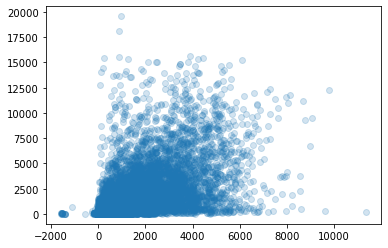

In [55]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, X_test['target'], alpha=0.2)

In [56]:
xgb.get_booster().get_score(importance_type='weight')

{'intensity': 687,
 'intensity_entity_id_144_max': 80,
 'yesterday_value': 371,
 'intensity_entity_id_48_max': 94,
 'hour_today': 355,
 'intensity_entity_id_dayofweek_today_24_mean': 84,
 'intensity_entity_id_96_mean': 152,
 'intensity_entity_id_dayofweek_today_24_max': 58,
 'intensity_entity_id_144_mean': 153,
 'intensity_entity_id_24_mean': 210,
 'intensity_entity_id_120_mean': 115,
 'intensity_entity_id_24_max': 118,
 'intensity_entity_id_72_mean': 141,
 'dayofweek_tomorrow': 56,
 'intensity_entity_id_96_std': 123,
 'intensity_entity_id_72_std': 136,
 'intensity_entity_id_120_min': 51,
 'distance_to_centroid': 60,
 'intensity_entity_id_144_std': 117,
 'intensity_entity_id_120_max': 61,
 'intensity_entity_id_48_mean': 162,
 'intensity_entity_id_24_min': 102,
 'day_tomorrow': 38,
 'month_tomorrow': 16,
 'dayofweek_today': 63,
 'intensity_entity_id_72_max': 60,
 'intensity_entity_id_24_std': 178,
 'day_today': 148,
 'intensity_entity_id_96_max': 54,
 'intensity_entity_id_48_std': 161,


In [57]:
!pip install shap

In [58]:
import shap

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test[COLS_TO_KEEP].fillna(9999).astype(float))

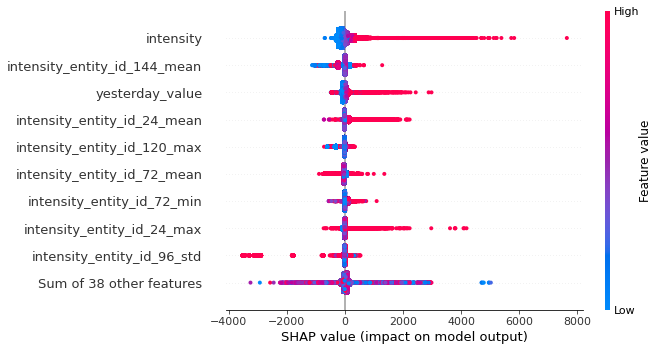

In [59]:
shap.plots.beeswarm(shap_values)

In [60]:
tmp = X_test[X_test.entity_id == 'urn:ngsi-ld:TrafficFlowObserved:porto:traffic:CMP:CT7Z3']

In [61]:
tmp = tmp[
    (tmp.dateobserved < '2018-08-12')# & (tmp.dateobserved > '2018-05-18')
]

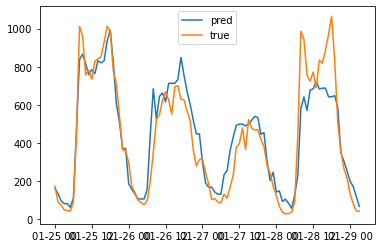

In [62]:
plt.plot(tmp['dateobserved'][600:700], tmp['pred_score'][600:700], label='pred')
plt.plot(tmp['dateobserved'][600:700], tmp['target'][600:700], label='true')
plt.legend()